# Acknowledgements

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.youtube.com/watch?v=Qq2X-K2Ku3s

https://www.kaggle.com/dgawlik/house-prices-eda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import LassoLars
from sklearn.linear_model import LarsCV
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 100

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']

print("Train data shape: ", train.shape)
print("Test data shape: ", test.shape)

Train data shape:  (1460, 81)
Test data shape:  (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [5]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


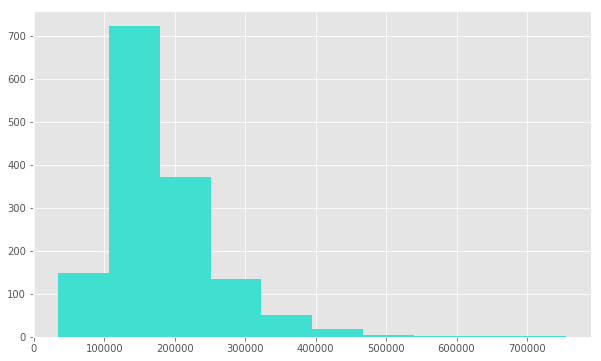

Skew is: 0.12133506220520406


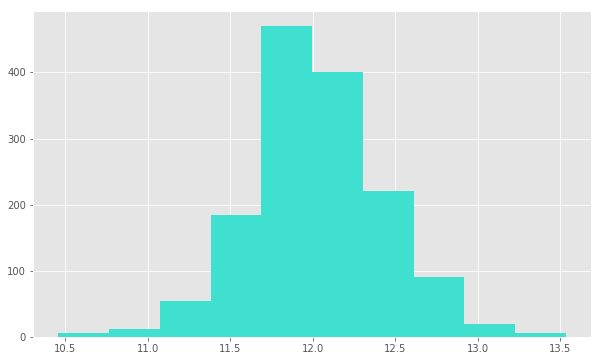

In [6]:
print("Skew is:", train.SalePrice.skew())
SP = plt.hist(train.SalePrice, color="turquoise")
plt.show()

target = np.log(train.SalePrice)
print("Skew is:", target.skew())
logSP = plt.hist(target, color="turquoise")
plt.show()

In [7]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False)[:])

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

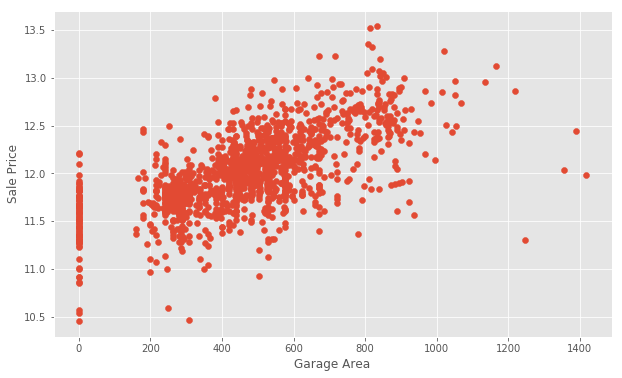

In [8]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [9]:
train = train[train['GarageArea'] < 1200]

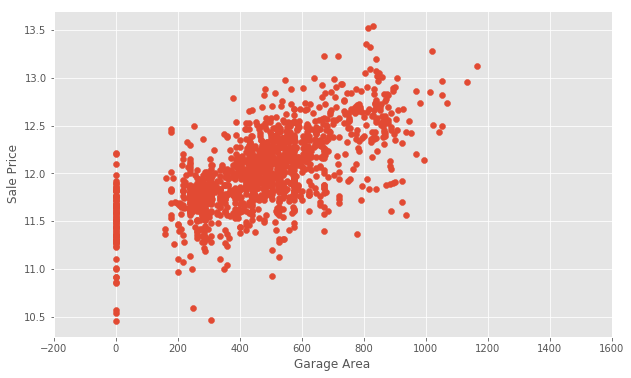

In [10]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

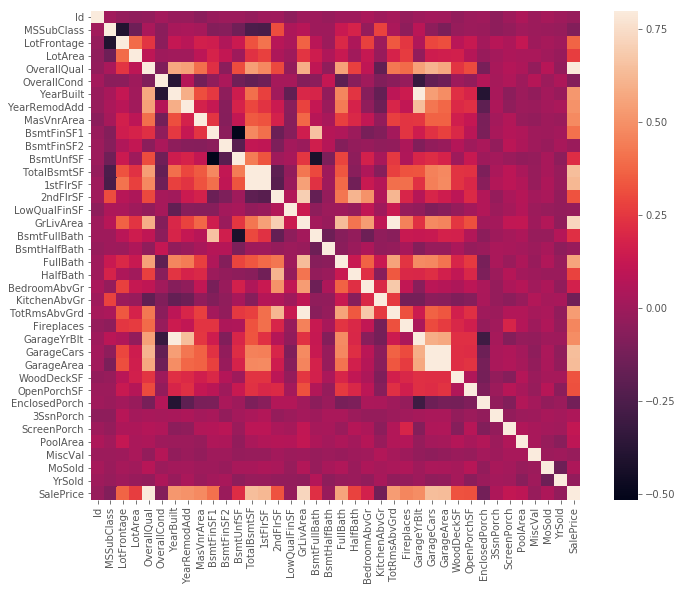

In [11]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

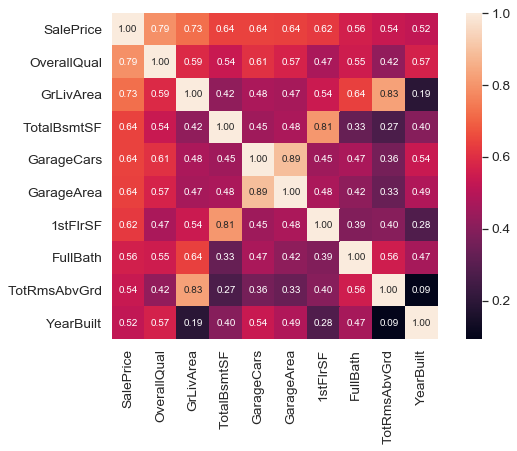

In [12]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

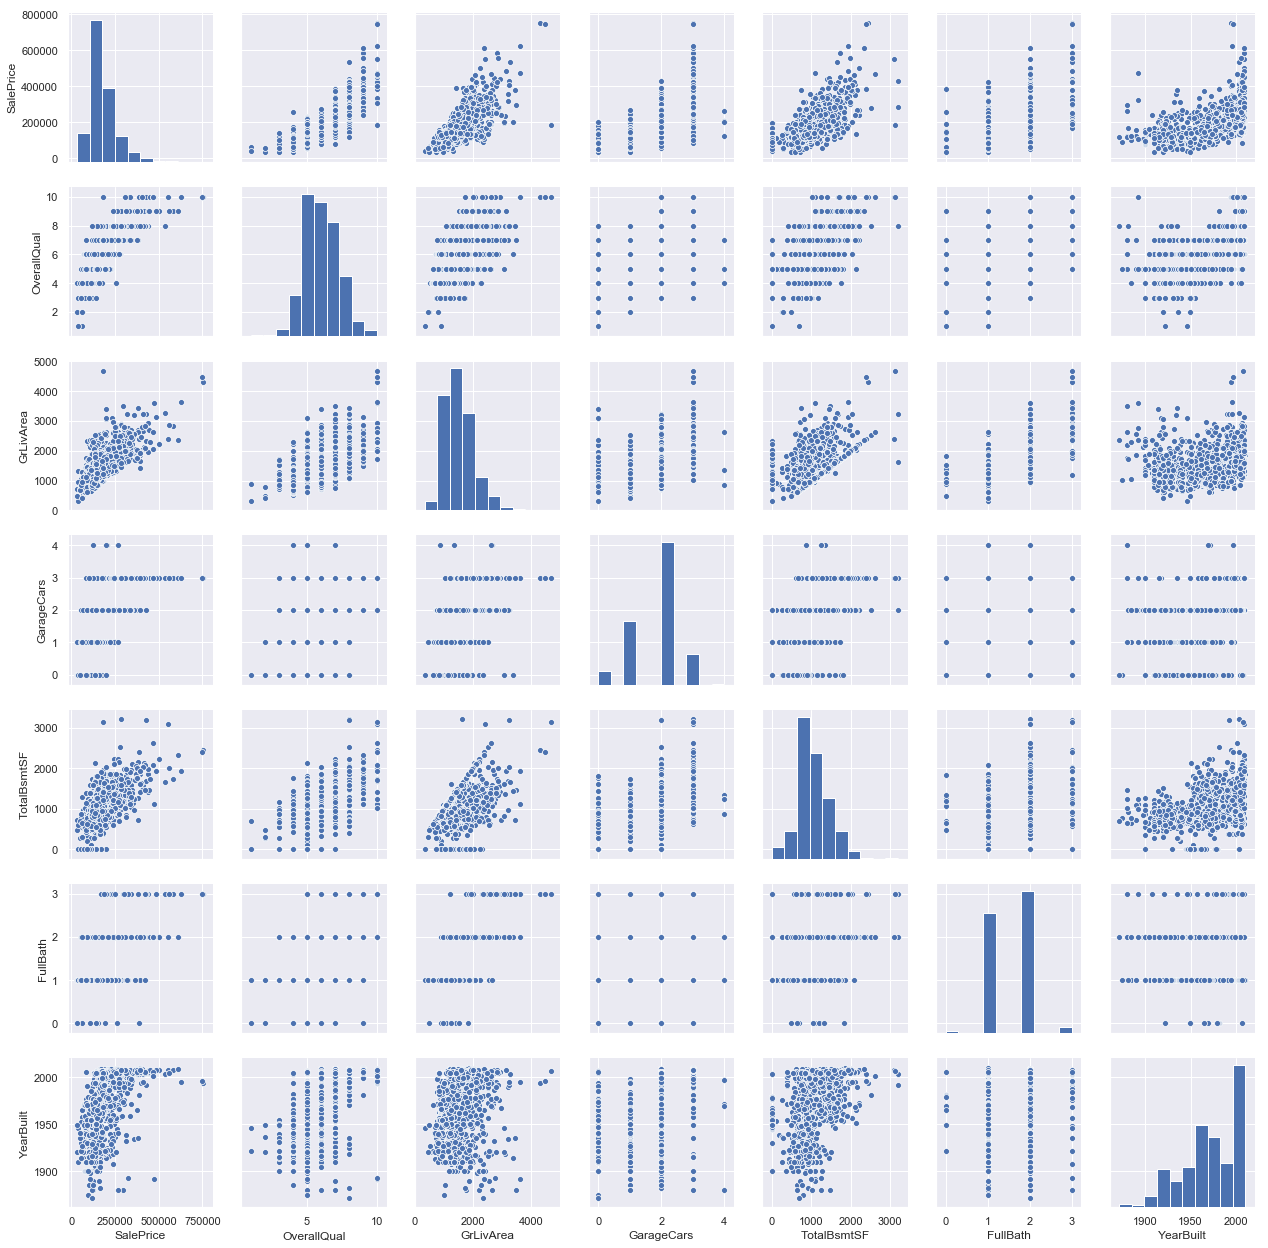

In [13]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

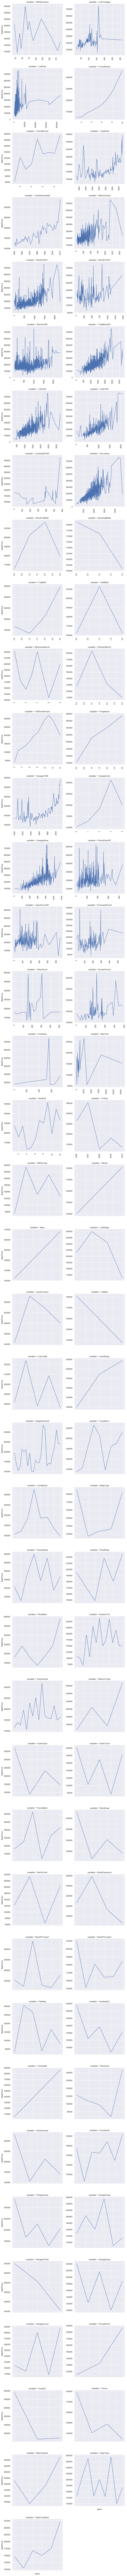

In [14]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative+qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(pairplot, "value", "SalePrice")

In [15]:
null = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
nulls = pd.concat([null, percent], axis=1, keys=['Nulls', 'Percent'])
nulls.head(15)

,Nulls,Percent
PoolQC,1449,0.995876
MiscFeature,1402,0.963574
Alley,1364,0.937457
Fence,1174,0.806873
FireplaceQu,689,0.473540
LotFrontage,258,0.177320
GarageCond,81,0.055670
GarageType,81,0.055670
GarageYrBlt,81,0.055670
GarageFinish,81,0.055670


In [16]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()
#Count column - non-null obsverations 
# unique - count of unique values 
# top most common occurring value 
# freq freq of top value

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1455,1447,1455,1455,1455,1418,1418,1417,1418,1417,1455,1455,1455,1454,1455,1455,766,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,1441,1216,722,1139,1430,514,503,863,905,1278,644,647,1306,951,428,1251,1423,737,1360,1329,733,1355,377,867,605,1306,1321,1335,2,157,48,1266,1196


In [17]:
print("original: \n")
print(train.Street.value_counts(), "\n")


original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In [18]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(test.Street, drop_first=True)

In [19]:
print("Encoded: \n")
print(train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


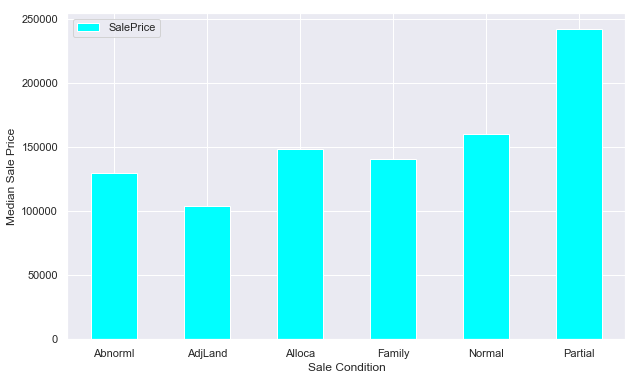

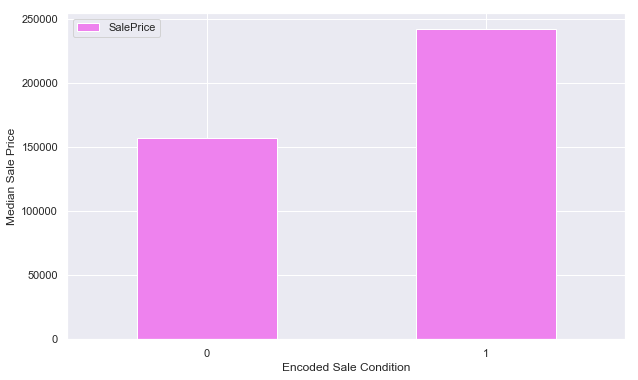

In [20]:
condition_pivot = train.pivot_table(index="SaleCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="aqua")
plt.xlabel("Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

def encode(x): return 1 if x == "Partial" else 0
train["EncCondition"] = train.SaleCondition.apply(encode)
test["EncCondition"] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index="EncCondition", values="SalePrice", aggfunc=np.median)
condition_pivot.plot(kind="bar", color="violet")
plt.xlabel("Encoded Sale Condition")
plt.ylabel("Median Sale Price")
plt.xticks(rotation=0)
plt.show()

In [21]:
data = train.drop(["TotRmsAbvGrd", "PoolArea", "LowQualFinSF", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1) 
testData = test.drop(["TotRmsAbvGrd", "PoolArea", "LowQualFinSF", "PoolQC", "MiscFeature", "Alley", "Fence"], axis=1)
# drop PoolArea and LowQualFinSF because they have no linear relationship with SalePrice
# drop PoolQC, MiscFeature, Alley and Fence because they have more than 80% of their data missing

data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [22]:
print(sum(data.isnull().sum() != 0))

0


In [23]:
y = np.log(train.SalePrice)
x = data.drop(['SalePrice', 'Id'], axis=1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [25]:
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262563


In [26]:
predictions = model.predict(X_test)
print("RMSE is: \n", mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567425


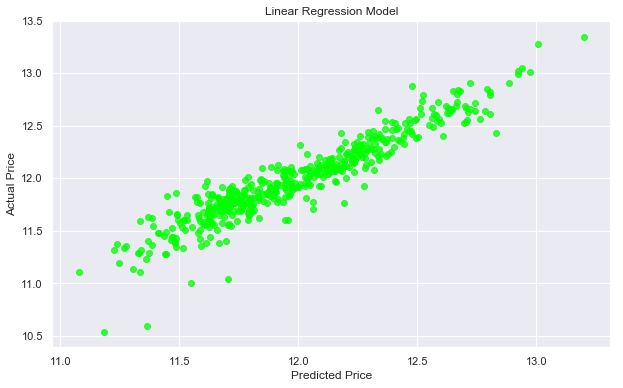

In [27]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75, color='lime')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

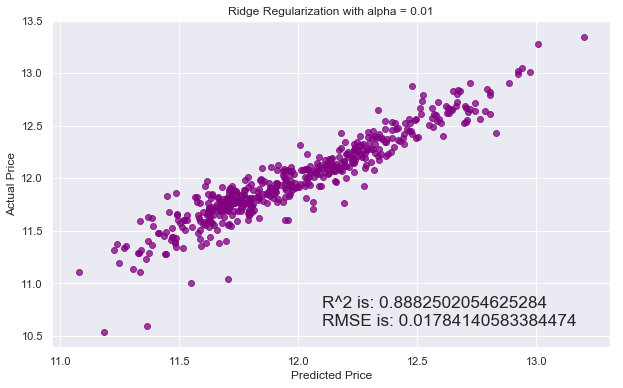

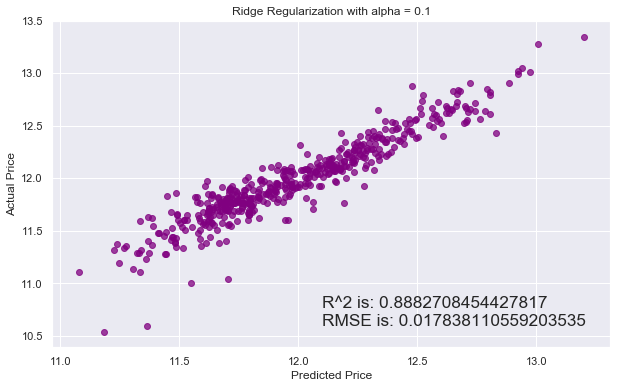

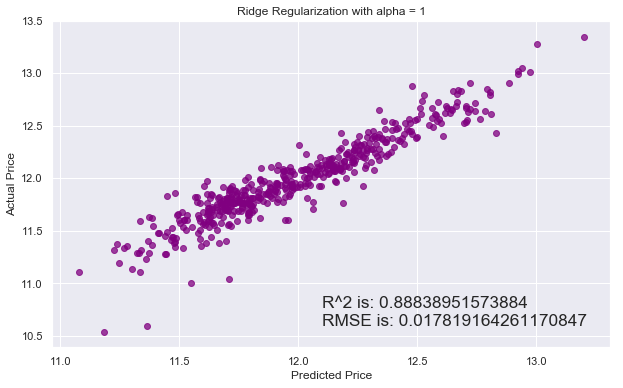

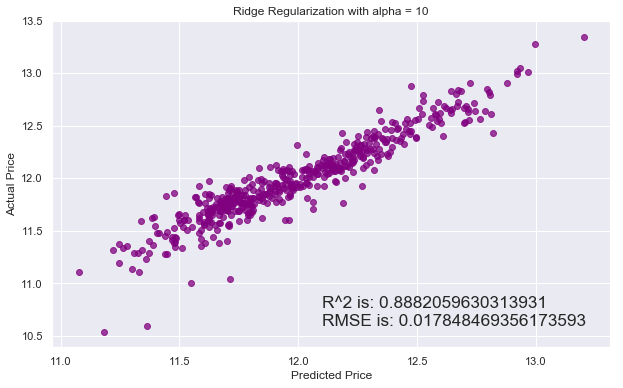

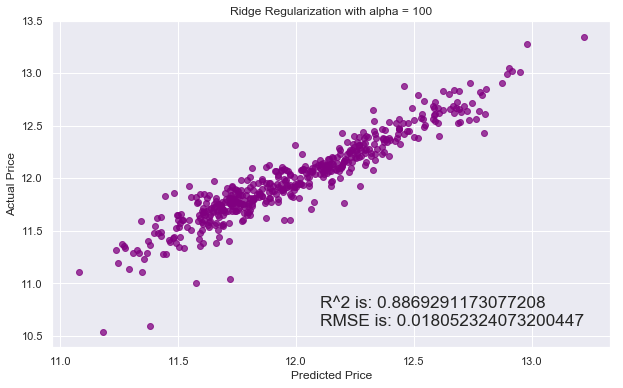

In [28]:
for i in range(-2,3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75,color='purple')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()
    

In [29]:
larsModel = LassoLars(alpha=0.0001).fit(X_train,y_train)
# does not improve the score (worsens it)

In [30]:
train_error = mean_squared_error(y_train, larsModel.predict(X_train))
test_error = mean_squared_error(y_test, larsModel.predict(X_test))
print ("Train data MSE is:")
print(train_error)
print ("Test data MSE is:")
print(test_error)

rsquared_train = larsModel.score(X_train,y_train)
rsquared_test = larsModel.score(X_test,y_test)
print ("Train data R^2 is:")
print(rsquared_train)
print ("Test data R^2 is:")
print(rsquared_test)

Train data MSE is:
0.017232197262474595
Test data MSE is:
0.017406942895131627
Train data R^2 is:
0.8909534699203726
Test data R^2 is:
0.8909714677098809


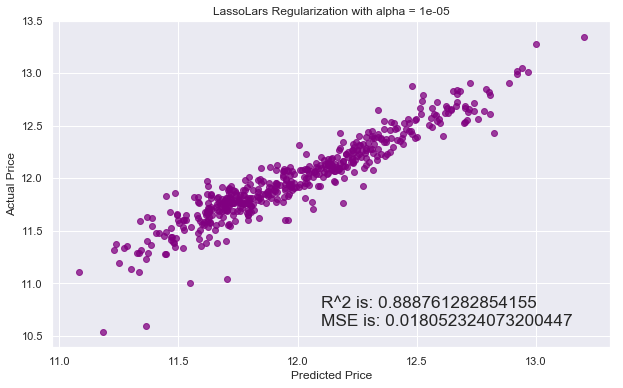

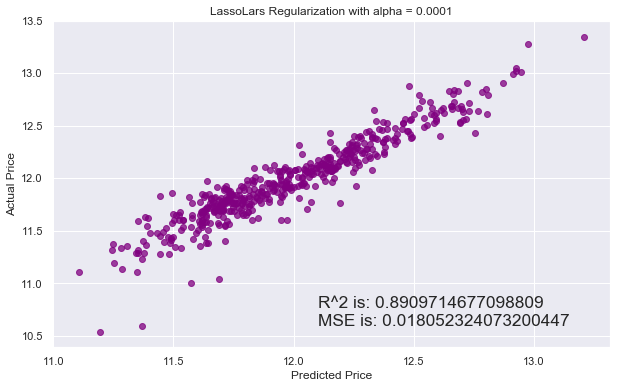

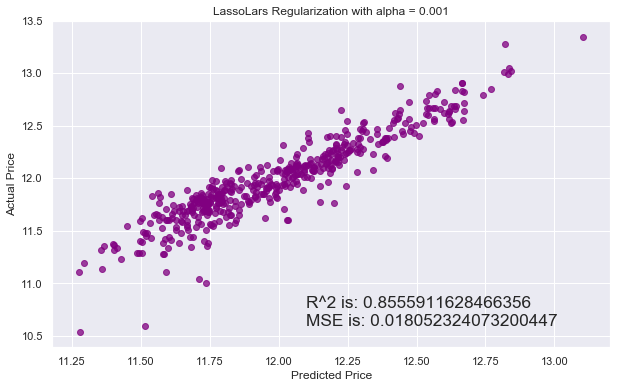

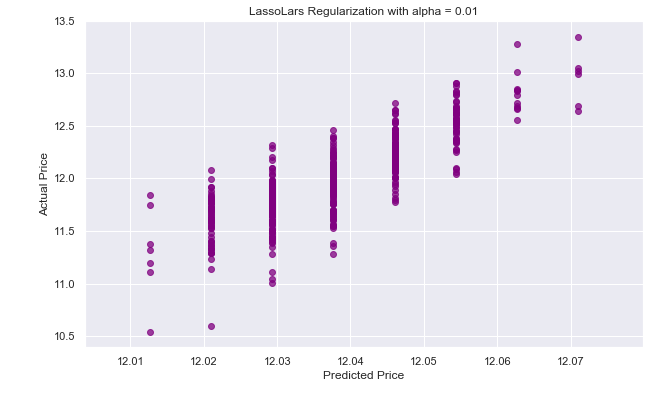

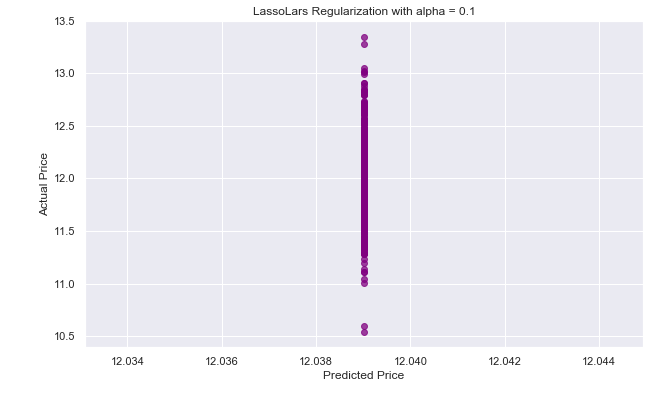

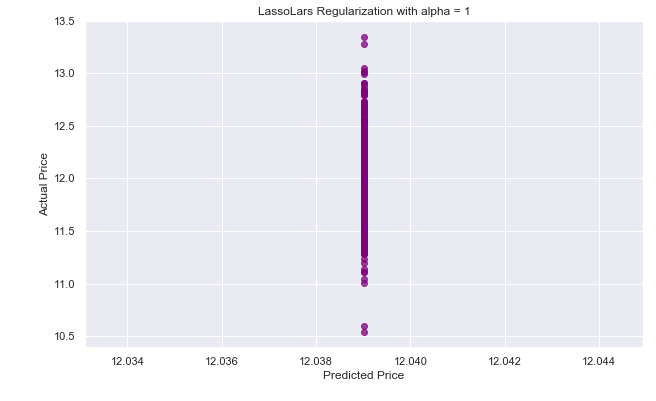

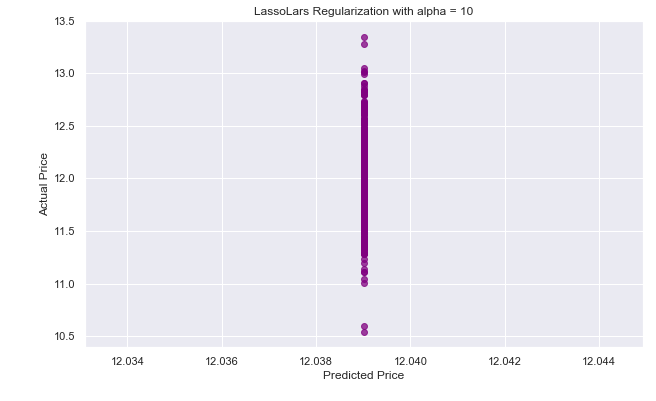

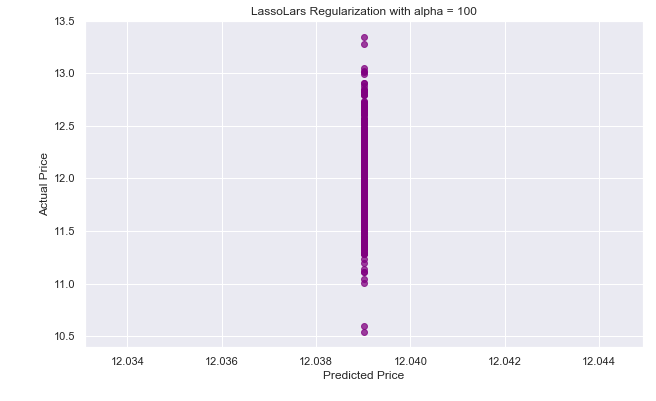

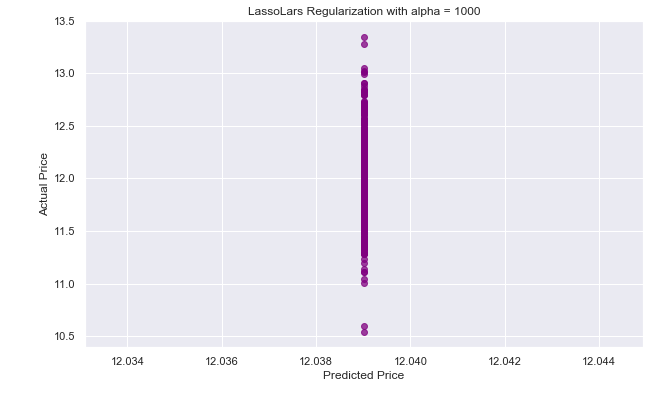

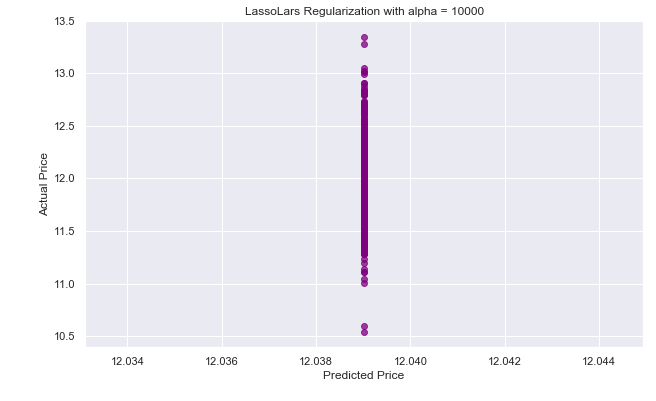

In [31]:
for i in range(-5,5):
    alpha = 10**i
    lasso = linear_model.LassoLars(alpha=alpha)
    lasso_model = lasso.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    
    plt.scatter(preds_lasso, actual_values, alpha=.75,color='purple')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('LassoLars Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(lasso_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [32]:
LarsCvModel = LarsCV(max_n_alphas=10).fit(X_train,y_train)
# does not improve the score (worsens it)

In [33]:
train_error = mean_squared_error(y_train, LarsCvModel.predict(X_train))
test_error = mean_squared_error(y_test, LarsCvModel.predict(X_test))
print ("Train data MSE is:")
print(train_error)
print ("Test data MSE is:")
print(test_error)

rsquared_train = LarsCvModel.score(X_train,y_train)
rsquared_test = LarsCvModel.score(X_test,y_test)
print ("Train data R^2 is:")
print(rsquared_train)
print ("Test data R^2 is:")
print(rsquared_test)

Train data MSE is:
0.017287175631659414
Test data MSE is:
0.017398063413601967
Train data R^2 is:
0.8906055630169336
Test data R^2 is:
0.8910270844166461


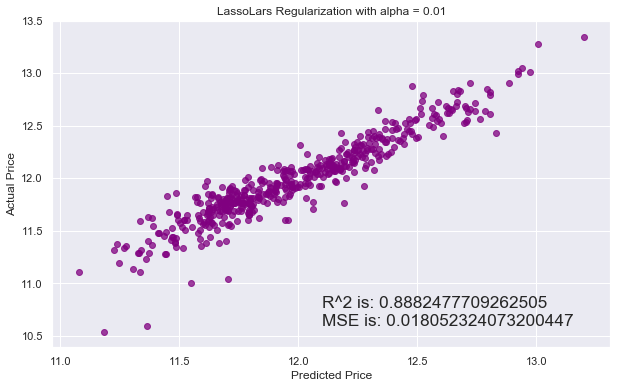

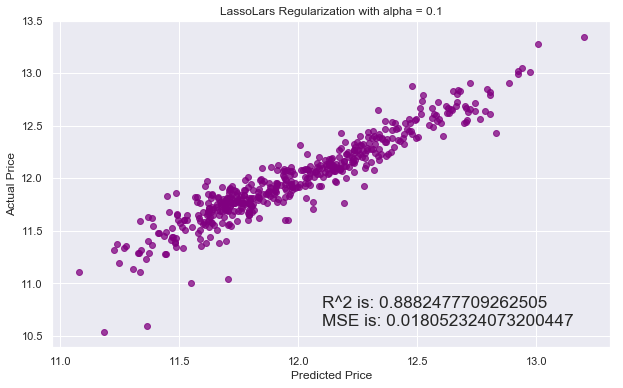

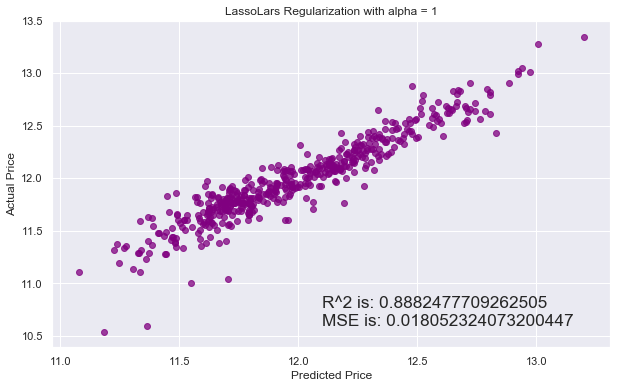

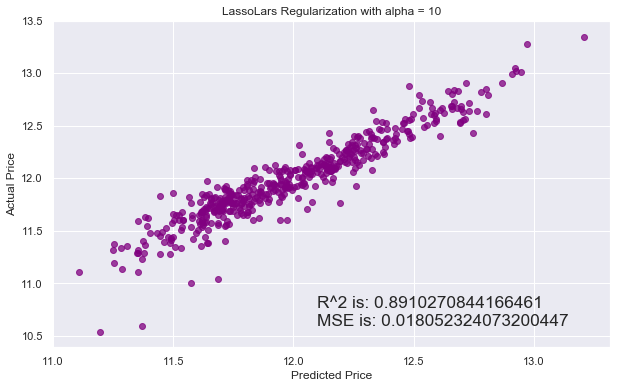

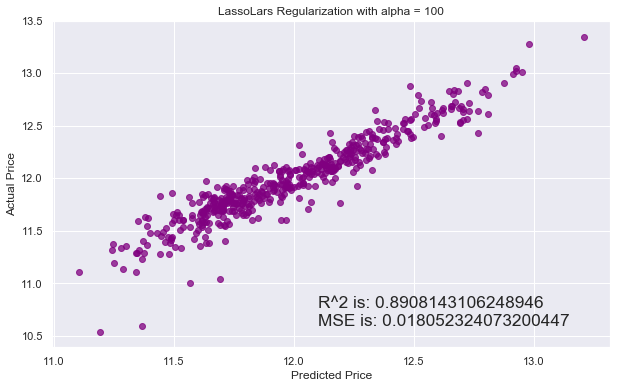

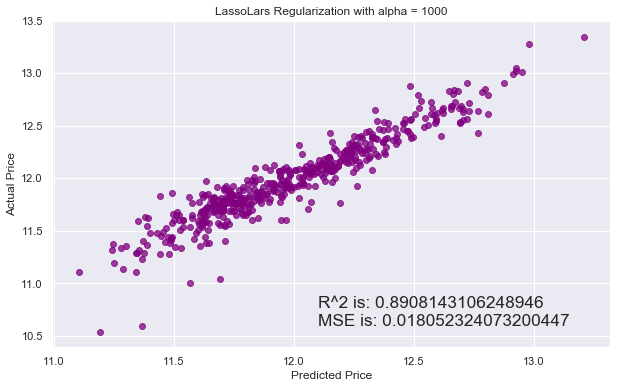

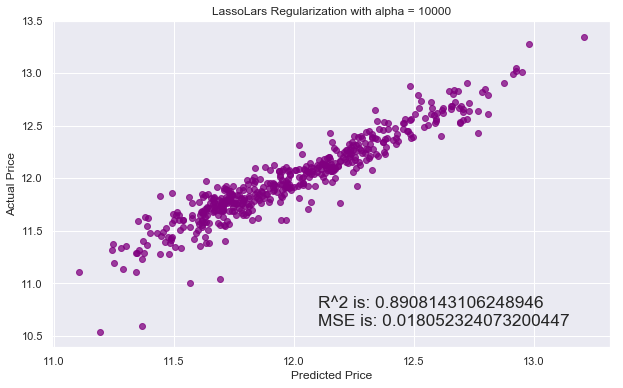

In [34]:
for i in range(-2,5):
    alpha = 10**i
    lasso = linear_model.LarsCV(max_n_alphas=alpha)
    lasso_model = lasso.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    
    plt.scatter(preds_lasso, actual_values, alpha=.75,color='purple')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('LassoLars Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(lasso_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [35]:
# use Lasso to try to get a better linear model
lassoModel = LassoLarsCV(cv=10, precompute=False, max_n_alphas=10).fit(X_train,y_train)

In [36]:
train_error = mean_squared_error(y_train, lassoModel.predict(X_train))
test_error = mean_squared_error(y_test, lassoModel.predict(X_test))
print ("Train data MSE is:")
print(train_error)
print ("Test data MSE is:")
print(test_error)

rsquared_train = lassoModel.score(X_train,y_train)
rsquared_test = lassoModel.score(X_test,y_test)
print ("Train data R^2 is:")
print(rsquared_train)
print ("Test data R^2 is:")
print(rsquared_test)
# gives a slightly higher value than Ridge Linear Model

Train data MSE is:
0.017174385501426834
Test data MSE is:
0.017432811123176652
Train data R^2 is:
0.8913193067224954
Test data R^2 is:
0.8908094418473451


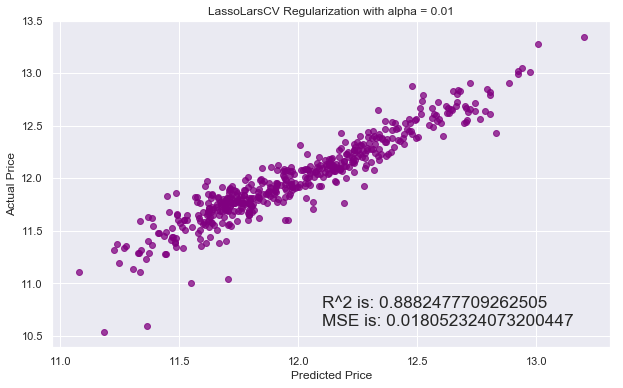

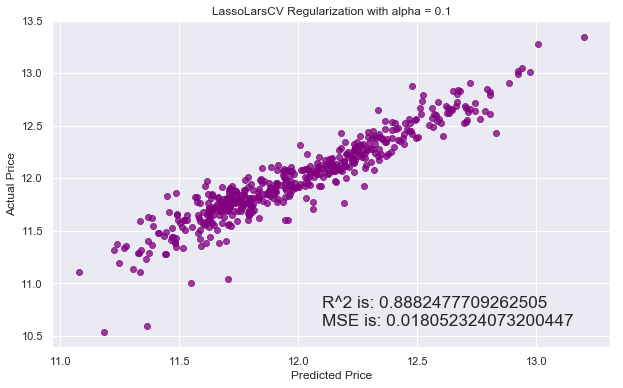

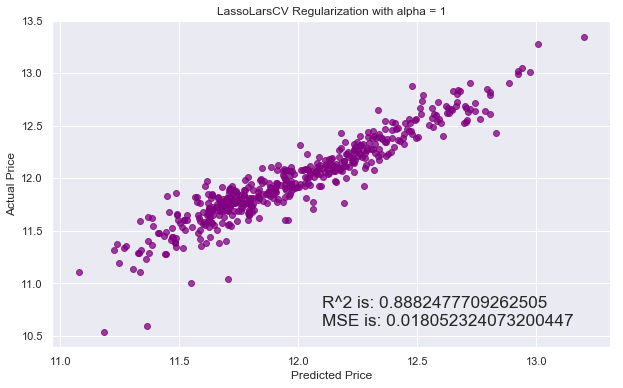

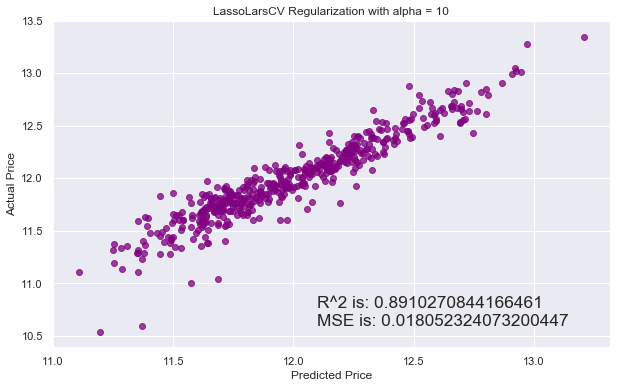

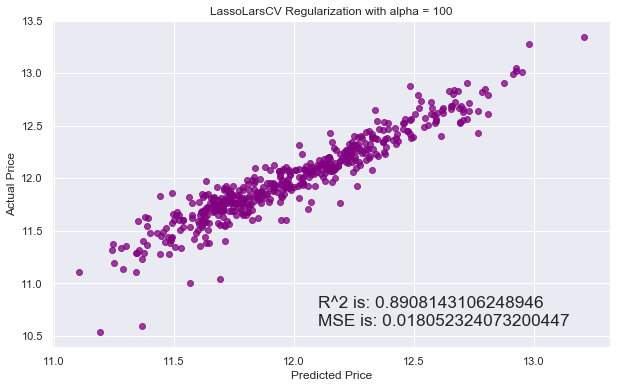

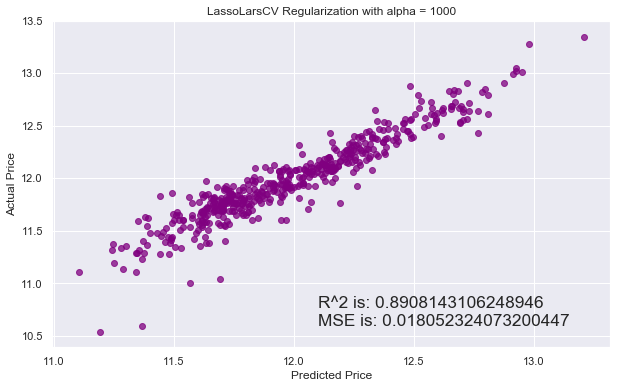

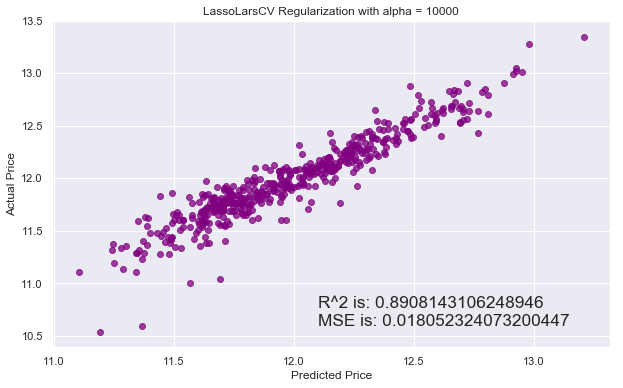

In [37]:
for i in range(-2,5):
    alpha = 10**i
    lasso = linear_model.LassoLarsCV(max_n_alphas=alpha)
    lasso_model = lasso.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)
    
    plt.scatter(preds_lasso, actual_values, alpha=.75,color='purple')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('LassoLarsCV Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nMSE is: {}'.format(lasso_model.score(X_test,y_test),mean_squared_error(y_test,preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [38]:
submission = pd.DataFrame()
submission['Id'] = test.Id

features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = lassoModel.predict(features)
final_predictions = np.exp(predictions)

In [39]:
print("Original Predictions were: \n", predictions[:10], "\n")
print("Final Predictions are: \n", final_predictions[:10])

Original Predictions were: 
 [11.74713129 11.83598138 12.06760149 12.19225697 12.11366535 12.05568805
 12.14793401 12.01837062 12.16617614 11.66107746] 

Final Predictions are: 
 [126390.46136389 138134.2586545  174137.6725685  197255.8639311
 182346.74577668 172075.40290164 188703.82590628 165772.32953051
 192177.77579243 115968.91515442]


In [40]:
submission["SalePrice"] = final_predictions
submission.head()

,Id,SalePrice
0,1461,126390.461364
1,1462,138134.258655
2,1463,174137.672568
3,1464,197255.863931
4,1465,182346.745777


In [41]:
submission.to_csv('submission.csv', index=False)